<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad3_PDI_filtrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 3 Procesamiento Digital de Imagenes 2024
## Filtrado espacial

In [2]:
# import de librerias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
from google.colab.patches import cv2_imshow   # eso este porque tiraba error el cv.imshow()

## Ejercicio 1:
Filtros pasa-bajos

1. Genere diferentes mascaras de promediado, utilizando filtro de promediado o caja (box filter) y el formato cruz. Aplique los filtros sobre una imagen y verifique los efectos de aumentar el tamaño de la mascara en la imagen resultante.
Ayuda: mask = np.ones((3,3),np.float32)/9

2. Genere mascaras de filtrado gaussianas con diferente σ y diferente tamaño. Visualice y aplique las mascaras sobre una imagen. Compare los resultados con los de un filtro de promediado del mismo tamaño.

3. Utilice el filtro de mediana sobre una imagen con diferentes tamaños de ventana. Compare los resultados con los filtros anteriores para un mismo tamaño.

4. Los filtros pasa-bajos pueden utilizarse para localizar objetos grandes en una escena. Aplique este concepto a la imagen ’hubble.tif’ y obtenga una imagen de grises cuyos objetos correspondan solamente a los de mayor tamaño de la original.

In [27]:
def crear_filtro_promediador(kernel_size,tipo):
  if tipo == 0:
    # filtro de caja
    return np.ones((kernel_size,kernel_size),np.float32) / (kernel_size*kernel_size)
  else:
    # filtro de cruz
    filtro = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    filtro[:, int(kernel_size/2)] = 1.0
    filtro[int(kernel_size/2), :] = 1.0
    return filtro / kernel_size

In [49]:
def crear_filtro_gausiano(kernel_size,var):
  aux = cv2.getGaussianKernel(kernel_size, var) # devuelve un vector
  filtro = np.outer(aux, aux.transpose()) # hago el producto matricial de vector por el traspuesto
  return filtro # supuestamente esta sin normalizar el filtro gausiano

In [55]:
# direccion de la imagen
img_url = 'cameraman.tif'
# cargo la imagen
img1 = cv2.imread(img_url,cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'imagen filtro cruz')

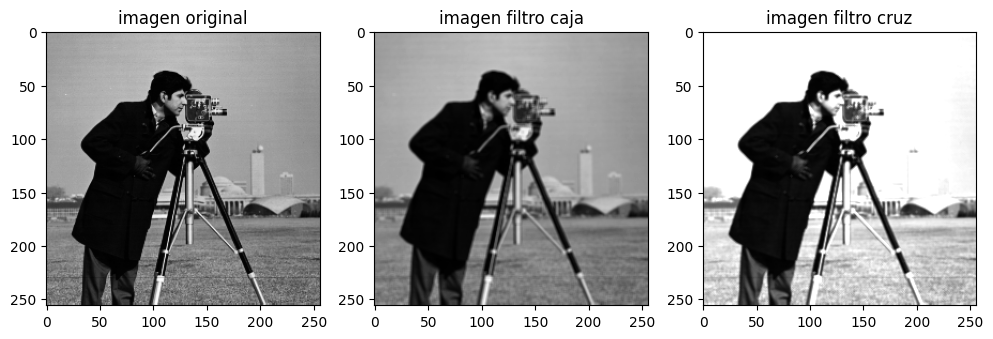

In [58]:
# EJERCICIO 1.1

# tamaño del kernel
kernel_size = 3

# filtro de caja
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
img1_1_caja = cv2.filter2D(img1, -1, filtro_caja)

# filtro de cruz
filtro_cruz = crear_filtro_promediador(kernel_size,tipo=1)
img1_1_cruz = cv2.filter2D(img1, -1, filtro_cruz)

# muestro las imagenes
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
ax[0].imshow(img1,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img1_1_caja,cmap='gray')
ax[1].set_title('imagen filtro caja')
ax[2].imshow(img1_1_cruz,cmap='gray')
ax[2].set_title('imagen filtro cruz')


Text(0.5, 1.0, 'imagen filtro gausiano, varianza: 1')

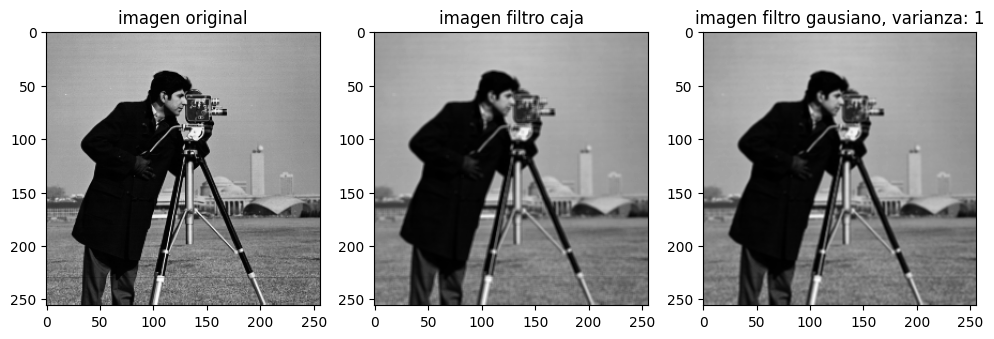

In [59]:
# EJERCICIO 1.2

# tamaño del kernel
kernel_size = 3

# filtro de caja para comparar
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
img1_2_caja = cv2.filter2D(img1, -1, filtro_caja)

# filtro gausiano
varianza = 1
filtro_gauss = crear_filtro_gausiano(kernel_size,varianza)
img1_2_gauss = cv2.filter2D(img1, -1, filtro_gauss)

# muestro las imagenes
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
ax[0].imshow(img1,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img1_2_caja,cmap='gray')
ax[1].set_title('imagen filtro caja')
ax[2].imshow(img1_2_gauss,cmap='gray')
ax[2].set_title('imagen filtro gausiano, varianza: '+str(varianza))


Text(0.5, 1.0, 'filtro mediana: ')

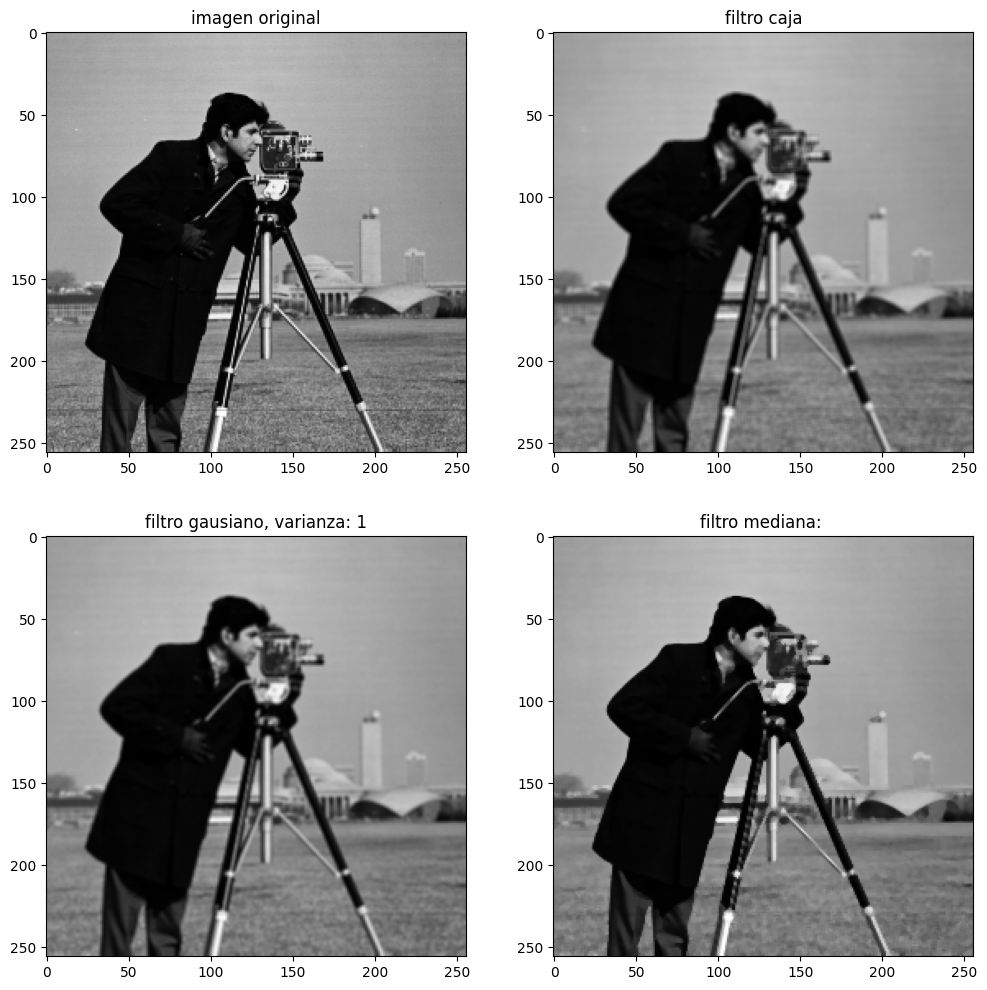

In [85]:
# EJERCICIO 1.3
# tamaño del kernel
kernel_size = 3

# filtro de caja para comparar
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
img1_3_caja = cv2.filter2D(img1, -1, filtro_caja)

# filtro gausiano
varianza = 1
filtro_gauss = crear_filtro_gausiano(kernel_size,varianza)
img1_3_gauss = cv2.filter2D(img1, -1, filtro_gauss)

# filtro de mediana
img1_3_mediana = cv2.medianBlur(img1, kernel_size)

# muestro las imagenes
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
ax[0,0].imshow(img1,cmap='gray')
ax[0,0].set_title('imagen original')
ax[0,1].imshow(img1_3_caja,cmap='gray')
ax[0,1].set_title('filtro caja')
ax[1,0].imshow(img1_3_gauss,cmap='gray')
ax[1,0].set_title('filtro gausiano, varianza: '+str(varianza))
ax[1,1].imshow(img1_3_mediana,cmap='gray')
ax[1,1].set_title('filtro mediana: ')

In [65]:
# EJERCICIO 1.4
img1_4 = cv2.imread('hubble.tif',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'filtro gauss, var: 2')

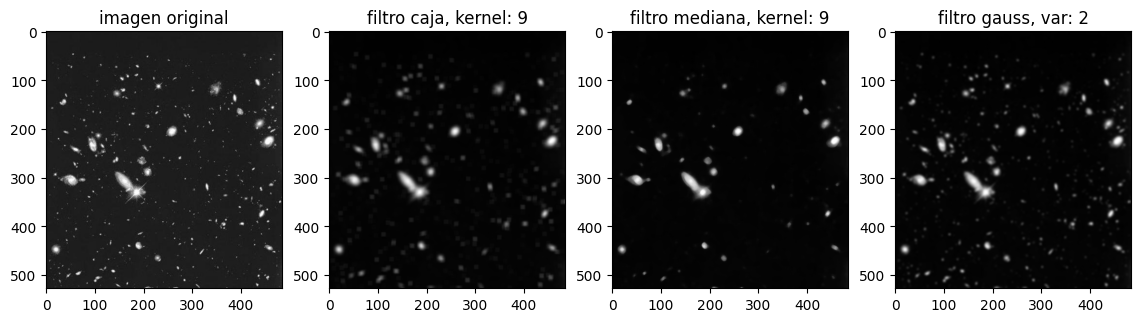

In [98]:
kernel_size = 9
# filtro caja
filtro4 = crear_filtro_promediador(kernel_size,tipo=0)
img1_4_caja = cv2.filter2D(img1_4, -1, filtro4)
# filtro mediana
img1_4_med = cv2.medianBlur(img1_4,kernel_size)
# filtro gaussiano
var = 2
filtro_gauss = crear_filtro_gausiano(kernel_size,var)
img1_4_gaus = cv2.filter2D(img1_4, -1, filtro_gauss)

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(14,12))
ax[0].imshow(img1_4,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img1_4_caja,cmap='gray')
ax[1].set_title('filtro caja, kernel: '+str(kernel_size))
ax[2].imshow(img1_4_med,cmap='gray')
ax[2].set_title('filtro mediana, kernel: '+str(kernel_size))
ax[3].imshow(img1_4_gaus,cmap='gray')
ax[3].set_title('filtro gauss, var: '+str(var))

### Se puede apreciar que el filtro de mediana es el que mejor resultados muestra, ya que aquellos objetos pequeños son los que menos se ven luego de aplicar el filtro

## Ejercicio 2:
Filtros pasa-altos

1. Defina mascaras de filtrado pasa-altos cuyos coeficientes sumen 1 y aplıquelas sobre diferentes im´agenes. Interprete los resultados.

2. Repita el ejercicio anterior para mascaras cuyos coeficientes sumen 0. Compare los resultados con los del punto anterior.

In [165]:
def crear_filtro_pasa_alto(kernel_size,suma):
  if suma == 1:
    filtro = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    filtro[:, int(kernel_size/2)] = 1.0
    filtro[int(kernel_size/2), :] = 1.0
    filtro[int(kernel_size/2), int(kernel_size/2)] = 2*kernel_size-1
    return filtro / np.sum(filtro)
  else:
    filtro = (-1)*np.ones((kernel_size,kernel_size),np.float32)
    filtro[int(kernel_size/2), int(kernel_size/2)] = kernel_size*kernel_size -1
    return filtro

filtro suma 1 tipo cruz
[[0.         0.11111111 0.        ]
 [0.11111111 0.5555556  0.11111111]
 [0.         0.11111111 0.        ]]
---------------------------
filtro suma 1 tipo caja
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


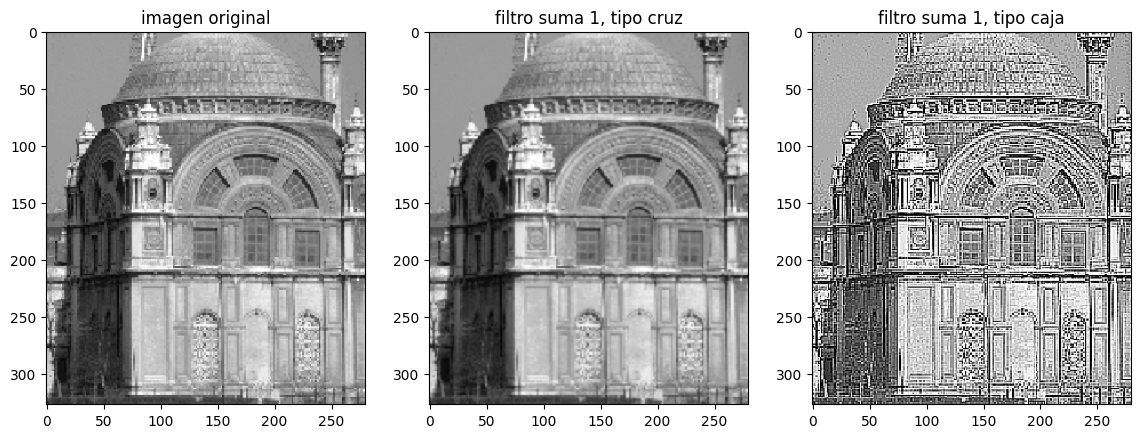

In [159]:
# EJERCICIO 2.1
img2_1 = cv2.imread('estanbul.tif',cv2.IMREAD_GRAYSCALE)

# filtro suma 1
# tipo cruz
filtro_suma1_cruz = crear_filtro_pasa_alto(kernel_size=3,suma=1)
img2_1_suma1_cruz = cv2.filter2D(img2_1, -1, filtro_suma1_cruz)
# tipo caja
filtro_suma1_caja = (-1)*np.ones((3,3),np.float32)
filtro_suma1_caja[1,1] = 9
filtro_suma1_caja = filtro_suma1_caja / np.sum(filtro_suma1_caja)
img2_1_suma1_caja = cv2.filter2D(img2_1, -1, filtro_suma1_caja)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(14,12))
ax[0].imshow(img2_1,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img2_1_suma1_cruz,cmap='gray')
ax[1].set_title('filtro suma 1, tipo cruz')
ax[2].imshow(img2_1_suma1_caja,cmap='gray')
ax[2].set_title('filtro suma 1, tipo caja')

print('filtro suma 1 tipo cruz')
print(filtro_suma1_cruz)
print('---------------------------')
print('filtro suma 1 tipo caja')
print(filtro_suma1_caja)


filtro suma 0 tipo cruz
[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]
---------------------------
filtro suma 0 tipo caja
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


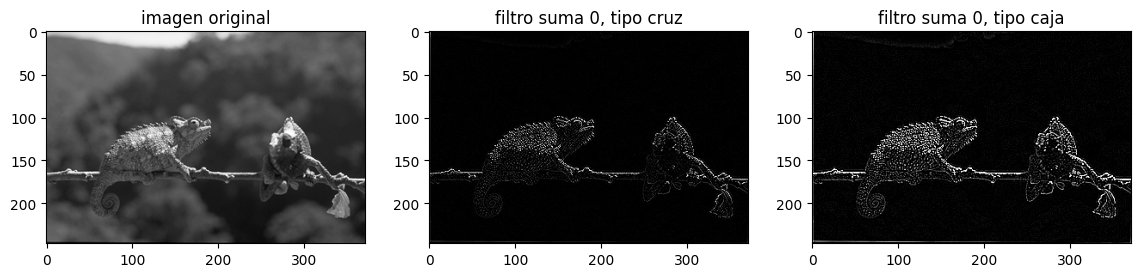

In [171]:
# EJERCICIO 2.2
img2_2 = cv2.imread('camaleon.tif',cv2.IMREAD_GRAYSCALE)

# filtro suma 0
# tipo caja
filtro_suma0_caja = crear_filtro_pasa_alto(kernel_size=3,suma=0)
img2_2_suma0_caja = cv2.filter2D(img2_2, -1, filtro_suma0_caja)
# tipo cruz
filtro_suma0_cruz = np.zeros((3,3),np.float32)
filtro_suma0_cruz[:, 1] = -1.0
filtro_suma0_cruz[1, :] = -1.0
filtro_suma0_cruz[1,1] = 4
img2_2_suma0_cruz = cv2.filter2D(img2_2, -1, filtro_suma0_cruz)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(14,12))
ax[0].imshow(img2_2,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img2_2_suma0_cruz,cmap='gray')
ax[1].set_title('filtro suma 0, tipo cruz')
ax[2].imshow(img2_2_suma0_caja,cmap='gray')
ax[2].set_title('filtro suma 0, tipo caja')

print('filtro suma 0 tipo cruz')
print(filtro_suma0_cruz)
print('---------------------------')
print('filtro suma 0 tipo caja')
print(filtro_suma0_caja)

## Ejercicio 3:
Filtros de acentuado

1. Obtenga versiones mejoradas de diferentes im´agenes mediante el filtrado por mascara difusa. Implemente el calculo como

    g(x,y) = f(x,y) −PB(f(x,y))

2. Una forma de enfatizar las altas frecuencias sin perder los detalles de bajas frecuencias es el filtrado de alta potencia. Implemente este procesamiento como la operacion aritmetica:

    g(x,y) = Af(x,y)−PB(f(x,y)), con A ≥ 1.

* Investigue y pruebe m´ etodos alternativos de c´alculo en una pasada.

## Ejercicio 4:
Trabajos de aplicacion

1. Proponga una combinacion de tecnicas para realzar los detalles de la imagen esqueleto.tif. Recuerde que esta tarea es subjetiva y depende de que pretende realzar. Justifique cada una de las elecciones en la elaboracion de su propuesta.

2. Aplique un filtro pasa-bajos de su eleccion y el filtro bilateral a las siguientes imagenes: mariposa02.png, flores02.jpg y lapices02.jpg (en escala de grises). Compare los resultados y explique sus apreciaciones. Utilice la funcion implementada en la guıa anterior para visualizar perfiles de grises, eligiendo la misma fila o columna para la imagen original y las que han sido filtradas. Compare los resultados visualizandolos simultaneamente.

[Opcional] Implemente una funcion que le permita extraer perfiles de grises de las 3 imagenes, de cualquier longitud y en cualquier direccion (a partir de clicks del mouse o mediante el ingreso de coordenadas) y que realice el ploteo de los perfiles superpuestos en diferentes colores.